<a href="https://colab.research.google.com/github/AdrianArguello/redes-neuronales-convolucionales/blob/main/CCN_Control_de_calidad_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga del dataset al entorno de trabajo

Cargamos las librerias

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Carga de dataset para entrenamiento
.....Se procesa el dataset de prueba y se divide en dos subconjuntos, uno para entrenanamiento y otro para la validación 

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/casting_data/train',
   validation_split=0.2, #Tomamos el 20% de los datos de entrenamiento para luego validar
  subset="training",
  seed=123,
  image_size=(300,300))  #Aspecto de imagen en relacion a px

Found 6633 files belonging to 2 classes.
Using 5307 files for training.


In [ ]:
# Validación
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/casting_data/train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(300,300))

Found 6633 files belonging to 2 classes.
Using 1326 files for validation.


Verificamos que las clases sean correctas. NOTA: def_front = Defectuoso y  ok_front = Optimo

In [ ]:
class_names = train_ds.class_names
print(class_names)

['def_front', 'ok_front']


Sacar muestras del dataset de entrenamiento y
Visualizar las muestras con sus respectivas etiquetas

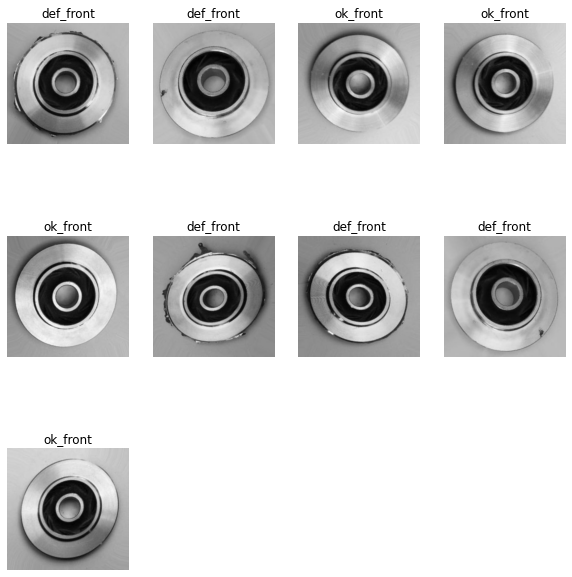

In [ ]:
import matplotlib.pyplot as plt # Importar la libreria de matplolib para graficar

plt.figure(figsize=(10, 15)) #Tamaño de las muestras a graficar
for images, labels in train_ds.take(1):#Recorrermos y mostramos las imagenes
  for i in range(9): 
    ax = plt.subplot(4, 4, i + 1) #ploteamos
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Verificamos las dimensiones del arreglo sean correctas y 
relación aspecto de px 300 x 300 con composición RGB (3)

In [ ]:
for image_batch, labels_batch in train_ds: # Recorremos un lote de imagenes con sus etiquetas
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


Creamos el modelo CNN

In [ ]:
num_classes = len(class_names) #Numero de clases 2 = def_front y ok_front

# Estructura de la red
# Fase 1 aprendizaje de caracteristicas
model = Sequential([  #Capa por capa
  layers.Rescaling(1./255, input_shape=(300, 300, 3)),# reescalamos a 0 y 1 

  layers.Conv2D(16, 3, padding='same', activation='relu'), # Filtros 16 / composición de imagen 3/activación relu
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),# Filtros 32 / composición 3/ activación relu
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),# Filtros 64 / composición 3 /activación relu
  layers.MaxPooling2D(),
  layers.Flatten(),# aplaneamiento de 2 dimensiones a 1

  # Fase 2 clasificación mediante red neuronal convencional

  layers.Dense(128, activation='relu'),#capa de salida 128 neuronas
  layers.Dense(num_classes)
])

Compilación del modelo con optimizador adam y crossentropy para la perdida,metrica de eactitud

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #Función de perdida dentro del entrenamiento
              metrics=['accuracy']) #Medimos la exactitud

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

Entrenamos el modelo

In [ ]:
epochs=4 # epocas iteración 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/4
166/166 [==============================] - 521s 3s/step - loss: 0.5490 - accuracy: 0.7200 - val_loss: 0.2554 - val_accuracy: 0.9223
Epoch 2/4
166/166 [==============================] - 384s 2s/step - loss: 0.1868 - accuracy: 0.9316 - val_loss: 0.0953 - val_accuracy: 0.9811
Epoch 3/4
166/166 [==============================] - 394s 2s/step - loss: 0.0817 - accuracy: 0.9757 - val_loss: 0.0453 - val_accuracy: 0.9902
Epoch 4/4
166/166 [==============================] - 409s 2s/step - loss: 0.1203 - accuracy: 0.9593 - val_loss: 0.0855 - val_accuracy: 0.9668


Realizamos las graficas de perdida y exactitud para la validación y entrenamiento

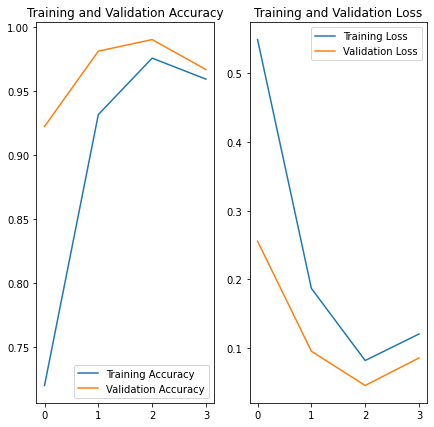

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Cargamos una imagen de prueba en el set de test y hacemos una predicción

In [ ]:
image_path = '/content/drive/MyDrive/casting_data/test/def_front/cast_def_0_61.jpeg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 57ms/step


Imprimimos la predicción

In [ ]:
score = tf.nn.softmax(predictions[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


Esta imagen parece ser def_front con un 99.97 % de exactitud.


Guardamos el modelo

In [ ]:
model.save('/content/drive/MyDrive/model')

importar modelo

In [ ]:
loaded_model =tf.keras.models.load_model('/content/drive/MyDrive/model')